In [18]:
import os
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

### Rename files to their respective labels

In [ ]:
# Path to the dataset folder
dataset_path = "data"

# List of animal folders
animal_folders = ["buffalo", "elephant", "rhino", "zebra"]

# Create a new folder to store the renamed files
output_image_dir = "data/images"
output_label_dir = "data/labels"
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Rename and move files
for animal in animal_folders:
    animal_path = os.path.join(dataset_path, animal)
    for filename in os.listdir(animal_path):
        if filename.lower().endswith(".jpg"):
            # Rename image file
            new_image_name = f"{animal}_{filename}"
            os.rename(
                os.path.join(animal_path, filename),
                os.path.join(output_image_dir, new_image_name)
            )
            # Rename corresponding label file
            label_filename = filename.lower().replace(".jpg", ".txt")
            new_label_name = f"{animal}_{label_filename}"
            os.rename(
                os.path.join(animal_path, label_filename),
                os.path.join(output_label_dir, new_label_name)
            )

print("Files renamed and moved successfully!")

Files renamed and moved successfully!


### Visualize the images

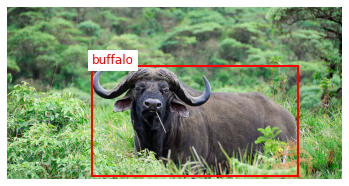

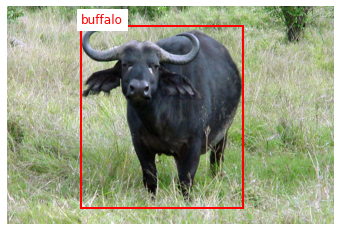

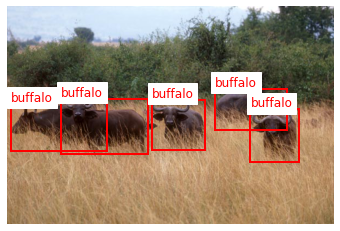

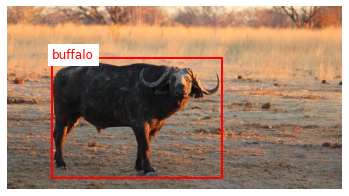

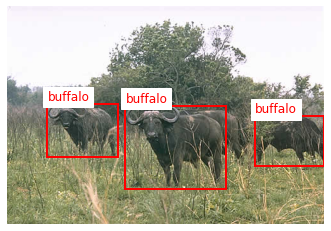

In [17]:
# Define class mapping
class_mapping = {
    "buffalo": 0,
    "elephant": 1,
    "rhino": 2,
    "zebra": 3
}

# Path to the images and labels folders
image_dir = "data/images"
label_dir = "data/labels"

# Define class names and colors for visualization
class_names = ["buffalo", "elephant", "rhino", "zebra"]
colors = ["red", "blue", "green", "purple"]  # One color per class

# Function to visualize images with bounding boxes
def visualize_image_with_boxes(image_path, label_path):
    # Open image
    image = Image.open(image_path)
    width, height = image.size

    # Create figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Read annotation file
    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, width_norm, height_norm = map(float, line.split())

            # Convert normalized coordinates to pixel coordinates
            x_center *= width
            y_center *= height
            width_norm *= width
            height_norm *= height

            # Calculate bounding box coordinates
            x1 = x_center - width_norm / 2
            y1 = y_center - height_norm / 2

            # Create a rectangle patch
            rect = patches.Rectangle(
                (x1, y1), width_norm, height_norm,
                linewidth=2, edgecolor=colors[int(class_id)], facecolor="none"
            )

            # Add the rectangle to the axis
            ax.add_patch(rect)

            # Add class label
            plt.text(
                x1, y1 - 5, class_names[int(class_id)],
                color=colors[int(class_id)], fontsize=12, backgroundcolor="white"
            )

    # Show the image with bounding boxes
    plt.axis("off")
    plt.show()

# Visualize a few images
for image_file in os.listdir(image_dir)[:5]:  # Visualize 5 images
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace(".jpg", ".txt"))
    visualize_image_with_boxes(image_path, label_path)

### Split the data into training, validation and test sets

In [20]:
import os
import random
from sklearn.model_selection import train_test_split

# Path to the images and labels folders
image_dir = "data/images"
label_dir = "data/labels"

# Define class names
class_names = ["buffalo", "elephant", "rhino", "zebra"]

# Create output directories
os.makedirs("data/train/images", exist_ok=True)
os.makedirs("data/train/labels", exist_ok=True)
os.makedirs("data/val/images", exist_ok=True)
os.makedirs("data/val/labels", exist_ok=True)
os.makedirs("data/test/images", exist_ok=True)
os.makedirs("data/test/labels", exist_ok=True)

# Initialize dictionaries to store file paths for each class
class_files = {class_name: [] for class_name in class_names}

# Group files by class
for image_file in os.listdir(image_dir):
    if image_file.endswith(".jpg"):
        class_name = image_file.split("_")[0]  # Extract class name from filename
        if class_name in class_names:
            class_files[class_name].append(image_file)

# Split each class into train, val, and test sets
for class_name, files in class_files.items():
    # Shuffle the files
    random.shuffle(files)

    # Split into train (80%), val (10%), and test (10%)
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

    # Move files to their respective folders
    for file in train_files:
        os.rename(
            os.path.join(image_dir, file),
            os.path.join("data/train/images", file)
        )
        os.rename(
            os.path.join(label_dir, file.replace(".jpg", ".txt")),
            os.path.join("data/train/labels", file.replace(".jpg", ".txt"))
        )

    for file in val_files:
        os.rename(
            os.path.join(image_dir, file),
            os.path.join("data/val/images", file)
        )
        os.rename(
            os.path.join(label_dir, file.replace(".jpg", ".txt")),
            os.path.join("data/val/labels", file.replace(".jpg", ".txt"))
        )

    for file in test_files:
        os.rename(
            os.path.join(image_dir, file),
            os.path.join("data/test/images", file)
        )
        os.rename(
            os.path.join(label_dir, file.replace(".jpg", ".txt")),
            os.path.join("data/test/labels", file.replace(".jpg", ".txt"))
        )

print("Dataset split completed successfully!")

Dataset split completed successfully!


In [26]:
def count_samples(folder):
    class_counts = {class_name: 0 for class_name in class_names}
    for image_file in os.listdir(folder):
        if image_file.endswith(".jpg"):
            class_name = image_file.split("_")[0]
            class_counts[class_name] += 1
    return class_counts

# Count samples in each set
train_counts = count_samples("data/train/images")
val_counts = count_samples("data/val/images")
test_counts = count_samples("data/test/images")

print("Train Set:", train_counts)
print("Validation Set:", val_counts)
print("Test Set:", test_counts)

Train Set: {'buffalo': 300, 'elephant': 300, 'rhino': 300, 'zebra': 300}
Validation Set: {'buffalo': 37, 'elephant': 37, 'rhino': 37, 'zebra': 38}
Test Set: {'buffalo': 38, 'elephant': 38, 'rhino': 38, 'zebra': 38}


### Resize the images to 416x416

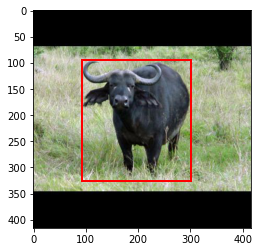

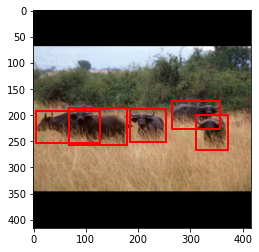

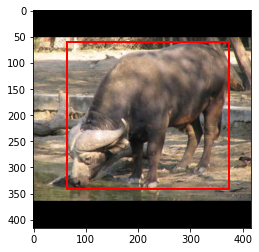

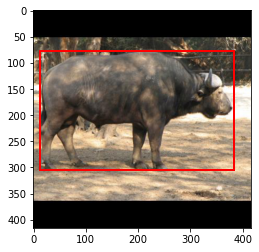

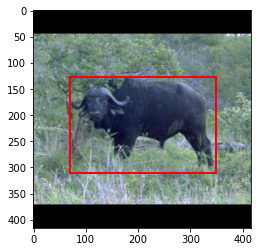

In [ ]:

def resize_images_with_padding(input_image_dir, output_image_dir, size=(416, 416)):
    """
    Resize images to the target size while maintaining aspect ratio by adding padding.
    """
    os.makedirs(output_image_dir, exist_ok=True)
    padding_info = {}

    for image_file in os.listdir(input_image_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(input_image_dir, image_file)
            image = Image.open(image_path)

            # Calculate the aspect ratio and padding
            original_width, original_height = image.size
            target_width, target_height = size
            aspect_ratio = min(target_width / original_width, target_height / original_height)
            new_width = int(original_width * aspect_ratio)
            new_height = int(original_height * aspect_ratio)
            delta_w = target_width - new_width
            delta_h = target_height - new_height
            padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))

            # Resize the image and add padding
            resized_image = image.resize((new_width, new_height), Image.BILINEAR)
            resized_image = ImageOps.expand(resized_image, padding, fill=(0, 0, 0))

            # Save the resized image
            resized_image_path = os.path.join(output_image_dir, image_file)
            resized_image.save(resized_image_path)

            # Store padding information
            padding_info[image_file] = {
                "original_size": (original_width, original_height),
                "resized_size": (new_width, new_height),
                "padding": padding,
                "scale": aspect_ratio  # Add scale factor to padding info
            }

    return padding_info

def rescale_labels_with_padding(input_label_dir, output_label_dir, padding_info, size=(416, 416)):
    """
    Rescale bounding box coordinates in the label files to match the resized images with padding.
    """
    os.makedirs(output_label_dir, exist_ok=True)
    
    for label_file in os.listdir(input_label_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(input_label_dir, label_file)
            with open(label_path, "r") as f:
                lines = f.readlines()

            image_file = label_file.replace(".txt", ".jpg")
            if image_file not in padding_info:
                print(f"Padding info not found for {image_file}. Skipping.")
                continue

            padding_data = padding_info[image_file]
            original_width, original_height = padding_data["original_size"]
            new_width, new_height = padding_data["resized_size"]
            padding_left, padding_top, _, _ = padding_data["padding"]
            scale = padding_data["scale"]
            
            target_width, target_height = size

            resized_lines = []
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.split())
                
                # Scale the dimensions while maintaining aspect ratio
                width_pixels = width * original_width * scale
                height_pixels = height * original_height * scale
                
                # Convert center coordinates to pixels, apply scaling and padding
                x_center_pixels = (x_center * original_width * scale) + padding_left
                y_center_pixels = (y_center * original_height * scale) + padding_top
                
                # Convert back to normalized coordinates (0-1) for final image size
                x_center_norm = x_center_pixels / target_width
                y_center_norm = y_center_pixels / target_height
                width_norm = width_pixels / target_width
                height_norm = height_pixels / target_height
                
                # Clip values to ensure they stay within [0, 1]
                x_center_norm = min(max(x_center_norm, 0), 1)
                y_center_norm = min(max(y_center_norm, 0), 1)
                width_norm = min(max(width_norm, 0), 1)
                height_norm = min(max(height_norm, 0), 1)

                resized_lines.append(f"{int(class_id)} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}\n")

            resized_label_path = os.path.join(output_label_dir, label_file)
            with open(resized_label_path, "w") as f:
                f.writelines(resized_lines)

base_dir = "data"
splits = ["train", "val", "test"]

for split in splits:
    input_image_dir = os.path.join(base_dir, split, "images")
    input_label_dir = os.path.join(base_dir, split, "labels")
    output_image_dir = os.path.join(base_dir, f"resized_{split}", "images")
    output_label_dir = os.path.join(base_dir, f"resized_{split}", "labels")

    padding_info = resize_images_with_padding(input_image_dir, output_image_dir)
    rescale_labels_with_padding(input_label_dir, output_label_dir, padding_info)

def visualize_resized_image(image_path, label_path):
    """
    Visualize a resized image with its bounding boxes.
    """
    image = Image.open(image_path)
    plt.imshow(image)

    # Read the resized label file
    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.split())

            # Convert normalized coordinates to pixel coordinates
            x1 = (x_center - width / 2) * 416
            y1 = (y_center - height / 2) * 416
            x2 = (x_center + width / 2) * 416
            y2 = (y_center + height / 2) * 416

            # Draw the bounding box
            rect = patches.Rectangle(
                (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="red", facecolor="none"
            )
            plt.gca().add_patch(rect)

    # Show the image
    plt.axis("on")
    plt.show()

# Visualize a resized image from the train set
split = "train"
for image_file in os.listdir(os.path.join(base_dir, f"resized_{split}", "images"))[:5]:  # Visualize 5 images
    image_path = os.path.join(base_dir, f"resized_{split}", "images", image_file)
    label_path = os.path.join(base_dir, f"resized_{split}", "labels", image_file.replace(".jpg", ".txt"))
    visualize_resized_image(image_path, label_path)

### Delete the unnecessary directories

In [23]:
import os
import shutil

# Define the folder path
folder_path = r"C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\data"

# List of files or directories to keep (use only names, not full paths)
keep_items = {"resized_test", "resized_train", "resized_val","train","test","val"}  # Change these to the actual names

# Iterate over all items in the folder
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)

    # If the item is not in the keep list, delete it
    if item not in keep_items:
        if os.path.isfile(item_path) or os.path.islink(item_path):  # Check if it's a file or symlink
            os.remove(item_path)  # Delete file
        elif os.path.isdir(item_path):  # Check if it's a directory
            shutil.rmtree(item_path)  # Delete directory
        print(f"Deleted: {item_path}")

print("Cleanup complete. Kept:", keep_items)


Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\buffalo
Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\elephant
Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\images
Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\labels
Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\rhino
Deleted: C:\Users\Vicky\Desktop\M2-MIA\Optimization for Computer Vision\dataset\zebra
Cleanup complete. Kept: {'resized_test', 'resized_train', 'val', 'test', 'train', 'resized_val'}
